<a href="https://colab.research.google.com/github/IanPol0/DataScienceNetflix/blob/main/DataScienceNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LAS FUNCIONES EN CAMELCASE Y LAS VARIABLES EN SNAKECASE Y RESPETENLO
##Los subtitulos en '##', Los ejercicios en '###'

#Trabajo Práctico Netflix
Septiembre 2022

##Import

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz
import numpy as np

In [162]:
url='https://raw.githubusercontent.com/IanPol0/DataScienceNetflix/main/NetflixHistory.csv'
history = pd.read_csv(url)

##Delete devices not required

In [163]:
devices_remove = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 
'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 
'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

#delete devices not required
for device in devices_remove:
  #print(len(history), device)
  history = history.drop(history.index[history['Device Type'] == device], inplace=False)
  history = history.reset_index(drop=True)

##Adapt time

In [164]:
#returns hours, minutes and seconds in seconds
def toSeconds(time_str):
  h, m, s = time_str.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

##Divide series and movies

In [165]:
identificator = []

for i in range(len(history['Title'])):
  if history['Title'][i].__contains__('Temporada'):
    identificator.append('serie')
  elif history['Title'][i].__contains__('Capítulo'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Season'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Clip'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Resumen'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Tráiler'): 
    identificator.append('serie')
  elif history['Title'][i].__contains__('Series'): 
    identificator.append('serie')
  else:
    identificator.append('movie')

history['Type'] = identificator

In [166]:
series = history[history['Type'] == 'serie']
series = series.reset_index(drop=True)
movies = history[history['Type'] == 'movie']
movies = movies.reset_index(drop=True)
del history['Type'], series['Type'], movies['Type']

##Exercises

###a) Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [167]:
devices_compare = {}

for dev in history['Device Type']:
  if dev not in devices_compare:
    devices_compare[dev] = 1
  else:
    devices_compare[dev] += 1

max(devices_compare, key=devices_compare.get)

'Apple Apple TV 4 Apple TV'

###b) Encontrar la película con más ocurrencias y la película con mayor duración total.

In [168]:
movies_compare = {}

for mov in movies['Title']:
  if mov not in movies_compare:
    movies_compare[mov] = 1
  else:
    movies_compare[mov] += 1

max(movies_compare, key=movies_compare.get)

'Star Wars: El Imperio contraataca'

In [169]:
movies_duration = {}

for mov in movies.index:
  if movies['Title'][mov] not in movies_duration:
    movies_duration[movies['Title'][mov]] = toSeconds(movies['Duration'][mov])
  else:
    movies_duration[movies['Title'][mov]] += toSeconds(movies['Duration'][mov])

max(movies_duration, key=movies_duration.get)

'Star Wars: El Imperio contraataca'

###c) Generar un TOP “N” de series vistas y graficar.

####i) Por tiempo visto.

In [170]:
series_duration = {}
name = ''

for ser in series.index:
  name = (series['Title'][ser].split(':'))[0]
  if name not in series_duration:
    series_duration[name] = toSeconds(series['Duration'][ser])
  else:
    series_duration[name] += toSeconds(series['Duration'][ser])

max(series_duration, key=series_duration.get)

'Cómo conocí a tu madre'

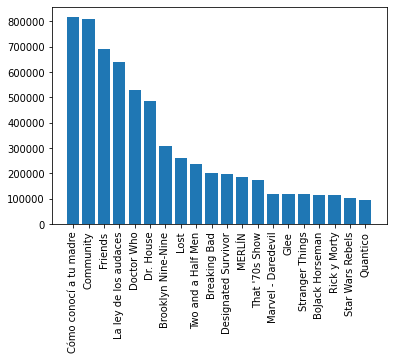

In [171]:
temp, final = {}, {}
temp = series_duration
for i in range(20):
  final[max(temp, key=temp.get)] = temp[max(temp, key=temp.get)]
  temp[max(temp, key=temp.get)] = 0
plt.bar(final.keys(), final.values())
plt.xticks(rotation = 90)
plt.show()

####ii) Por ocurrencias.

In [172]:
series_occurences = {}
name = ''

for ser in series.index:
  name = (series['Title'][ser].split(':'))[0]
  if name not in series_occurences:
    series_occurences[name] = 1
  else:
    series_occurences[name] += 1

max(series_occurences, key=series_occurences.get)

'Community'

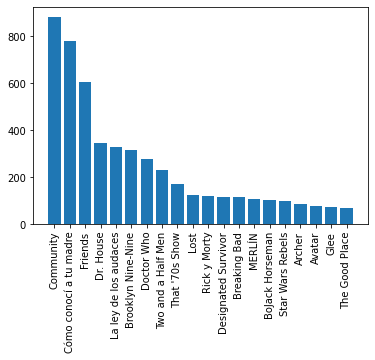

In [173]:
temp2, final2 = {}, {}
temp2 = series_occurences
for i in range(20):
  final2[max(temp2, key=temp2.get)] = temp2[max(temp2, key=temp2.get)]
  temp2[max(temp2, key=temp2.get)] = 0
plt.bar(final2.keys(), final2.values())
plt.xticks(rotation = 90)
plt.show()

###d) Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

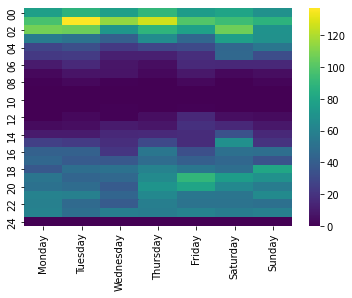

In [174]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

df = pd.DataFrame(index=hours, columns=week)
for col in df.columns:
    df[col].values[:] = 0

for day in history['Start Time']:
  week_day = (day.split('-'))[0]+ '-' +(day.split('-'))[1]+ '-' +((day.split('-'))[2]).split()[0]
  week_day = datetime.strptime(week_day, "%Y-%m-%d")
  week_day = week[week_day.weekday()]
  hour = ((day.split('-')[2]).split()[1]).split(':')[0]
  df[week_day][hour] += 1

df = df.astype(np.float64)
ax = sns.heatmap(df, cmap='viridis')

###e) Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

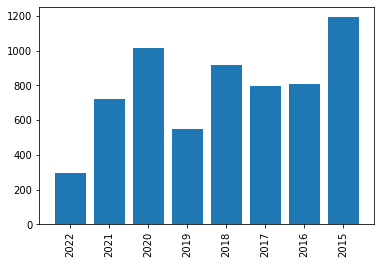

In [175]:
titulos_anios = {}
anio = ''

for title in history.index:
  anio = (history['Start Time'][title].split('-'))[0]
  if anio not in titulos_anios:
    titulos_anios[anio] = 1
  else:
    titulos_anios[anio] += 1

plt.bar(titulos_anios.keys(), titulos_anios.values())
plt.xticks(rotation = 90)
plt.show()

###f) Total de días de todos los títulos reproducidos.

In [176]:
total_days = []
day = ''

for day in history['Start Time']:
  day = (day.split('-'))[0]+ '/' +(day.split('-'))[1]+ '/' +((day.split('-'))[2]).split()[0]
  if day not in total_days:
    total_days.append(day)

len(total_days)

928

##Bonus

###1. Identificar cuál fue la película de Star Wars más veces vista por duración.

In [177]:
StarWars_duration = {}
name = ''

for mov in movies.index:
  name = (movies['Title'][mov].split(':'))[0]
  if name == 'Star Wars':
    if movies['Title'][mov] not in StarWars_duration:
      StarWars_duration[movies['Title'][mov]] = toSeconds(movies['Duration'][mov])
    else:
      StarWars_duration[movies['Title'][mov]] += toSeconds(movies['Duration'][mov])

max(StarWars_duration, key=StarWars_duration.get)

'Star Wars: El Imperio contraataca'